<a href="https://colab.research.google.com/github/LBMH-lang/LBMH/blob/master/B%C3%A0i_ti%E1%BB%83u_lu%E1%BA%ADn_k%E1%BA%BFt_th%C3%BAc_h%E1%BB%8Dc_ph%E1%BA%A7n_To%C3%A1n_Th%E1%BB%91ng_K%C3%AA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**BÀI TIỂU LUẬN CUỐI HỌC KÌ**

**Môn:** Toán và thống kê cho KHDL

Họ và tên: Lê Bá Minh Huy

Mã sinh viên: 20E1020004



In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from scipy.stats import shapiro
from scipy.stats import kstest
from scipy import stats


In [ ]:
plt.rcParams['figure.figsize']=[16,9]
plt.rcParams['figure.dpi']= 100
plt.rcParams.update({'font.size': 18})

In [ ]:
df = pd.read_csv("Diem - Diem.csv")

In [ ]:
df.sample(10)

,Mã SV,Điểm TBTN,Tỉ lệ Văn/Toán,Tổng HS,Hạng PT,Giới tính,Dân tộc,Học kỳ,Thời gian tự học,Điểm giữa kỳ,Thể thao,Điểm cuối kỳ
644,645,5.03,0.89,584,268,Nam,Khác,2,18,1.31,1,1.38
469,470,7.06,0.77,771,129,Nam,Kinh,1,25,2.43,0,2.32
26,27,6.85,0.92,152,45,Nam,Khác,2,47,2.11,1,2.00
97,98,5.24,1.08,341,270,Nam,Kinh,1,0,1.92,0,0.00
351,352,7.69,0.75,240,129,Nam,Kinh,1,30,2.00,0,2.93
591,592,6.29,0.76,132,18,Nam,Kinh,1,58,3.13,0,2.89
410,411,6.01,0.72,413,31,Nam,Kinh,2,69,3.63,0,3.43
693,694,5.94,0.89,224,191,Nữ,Khác,1,0,1.64,0,0.00
640,641,8.04,0.74,673,106,Nam,Kinh,2,56,3.00,0,3.16
564,565,6.71,1.13,201,19,Nam,Kinh,2,11,2.31,0,2.90


In [ ]:
df.drop('person', axis= 1, inplace= True)
df.head()

## **Chạy mô hình kiểm định ANOVA**

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [ ]:
df.drop('Mã SV', axis= 1, inplace= True)

In [ ]:
high = low =  placebo = []
high = df['Điểm TBTN'][df['Tỉ lệ Văn/Toán'][df['Tổng HS'][df['Hạng PT'][df['Giới tính'][df['Dân tộc'][df['Học kỳ'][df['Thời gian tự học'][df['Điểm giữa kỳ'][df['Thể thao'][df['Điểm cuối kỳ'] == 'high']]]]]]]]]]
low = df['Điểm TBTN'][df['Tỉ lệ Văn/Toán'][df['Tổng HS'][df['Hạng PT'][df['Giới tính'][df['Dân tộc'][df['Học kỳ'][df['Thời gian tự học'][df['Điểm giữa kỳ'][df['Thể thao'][df['Điểm cuối kỳ'] == 'low']]]]]]]]]]
placebo = df['Điểm TBTN'][df['Tỉ lệ Văn/Toán'][df['Tổng HS'][df['Hạng PT'][df['Giới tính'][df['Dân tộc'][df['Học kỳ'][df['Thời gian tự học'][df['Điểm giữa kỳ'][df['Thể thao'][df['Điểm cuối kỳ'] == 'placebo']]]]]]]]]]

In [ ]:
Điểm_TBTN = df['Điểm TBTN']

Tổng_HS = df['Tổng HS']
Hạng_PT = df['Hạng PT']
Giới_tính = df['Giới tính']
Dân_tộc = df['Dân tộc']
Học_kỳ = df['Học kỳ']
Thời_gian_tự_học = df['Thời gian tự học']
Điểm_giữa_kỳ = df['Điểm giữa kỳ']
Thể_thao = df['Thể thao']
Điểm_cuối_kỳ = df['Điểm cuối kỳ']

In [ ]:
Tỉ_lệ_Văn_Toán = df['Tỉ lệ Văn/Toán']

In [ ]:
class thongke():
    def __init__(self, data):
        self.mean = np.mean(data)
        self.med = np.median(data)
        self.mod = statistics.mode(data)
        self.min = np.min(data)
        self.max = np.max(data)
        self.std = np.std(data)
        self.name = data.name
        self.data = (data - self.mean) /self.std
      
    def hist(self):
        plt.figure()
        ax = sns.distplot(self.data)
        plt.axvline(np.mean(self.data), color="r", linestyle="dashed", linewidth=5)
        _, max_ = plt.ylim()
        plt.text(
            self.data.mean() + self.data.mean() / 10,
            max_ - max_ / 10,
            "Mean: {:.2f}".format(self.mean),
        )
        plt.title(self.name)
        plt.xlabel("x")
        plt.ylabel("y")
        plt.show();   
    def qq(self):
        sm.qqplot(self.data, line='45')
        plt.show()
        a = [0.25,0.5,0.75]
        b = self.data.quantile(a)
        c = pd.DataFrame(b,a)
        print(c)
        print('-'*50)
    def shapiro(self):
        print('Kiểm định Shapori:')
        stat, p = stats.shapiro(self.data)
        print('stat=%.3f, p=%.3f' % (stat, p))
        if p > 0.05:
            print('Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn')
        else:
            print('Dữ liệu không tuân theo luật phân phối chuẩn, ta không thể sử dụng kiểm định Anova')
        print('-'*50)
    #def anova(self):
        #print('kiểm định anova:')
        #statistic, p_value = f_oneway(self.name)
        #print('statistic:',statistic, '; p value:',p_value)

In [ ]:
#Đầu tiên ta tiến hành kiểm tra các giả định
# Ta thấy các giả định đều độc lập với nhau
#"Giả định này được kiểm tra khi nghiên cứu được thiết kế.
#Điều này có nghĩa là tất cả các nhóm đều loại trừ lẫn nhau,
#tức là một cá nhân chỉ có thể thuộc về một nhóm.
#Ngoài ra, điều này có nghĩa là dữ liệu không phải là các thước đo lặp lại (không được thu thập theo thời gian). 
#Trong ví dụ này, điều kiện này được đáp ứng"

In [ ]:
# tiếp theo ta sẽ dùng Kiểm định tính thuần nhất của phương sai (homogeneity of variance)
from scipy.stats import bartlett
print('Kiểm định Bartlett:')
bartlett_test = bartlett(Điểm_TBTN,Tổng_HS,Hạng_PT,Học_kỳ,Thời_gian_tự_học,Điểm_giữa_kỳ,Thể_thao,Điểm_cuối_kỳ)
print(bartlett_test)
bartlettvalue,pvalue=bartlett_test
if (bartlettvalue > 0) and (pvalue < 0.05):
    print('Phương sai các nhóm không bằng nhau. Ta không thể sử dụng kiểm định Anova')
else:
    print('Phương sai các nhóm  bằng nhau.')
print('-'*50)

Kiểm định Bartlett:
BartlettResult(statistic=33852.89504863036, pvalue=0.0)
Phương sai các nhóm không bằng nhau. Ta không thể sử dụng kiểm định Anova
--------------------------------------------------


# Vẽ biểu đồ:

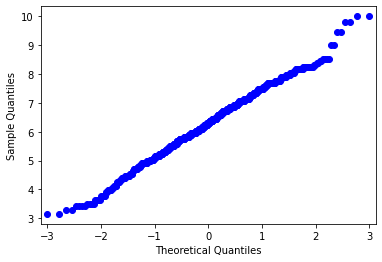

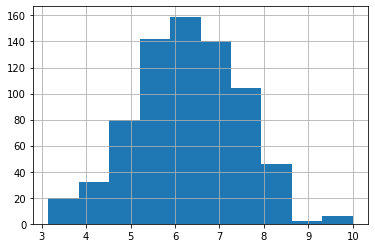

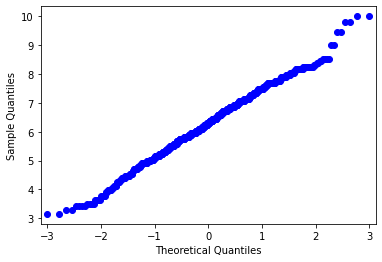

In [ ]:
Điểm_TBTN.hist()
sm.qqplot(Điểm_TBTN)


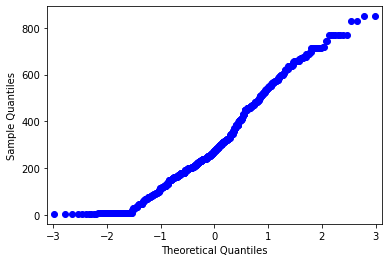

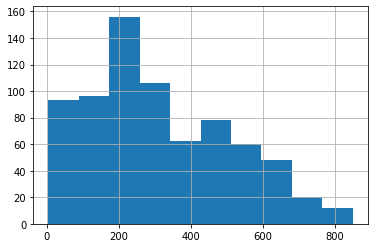

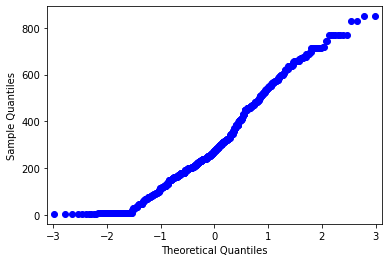

In [ ]:
Tổng_HS.hist()
sm.qqplot(Tổng_HS)


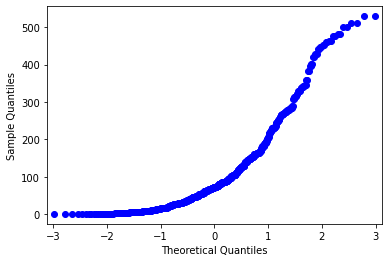

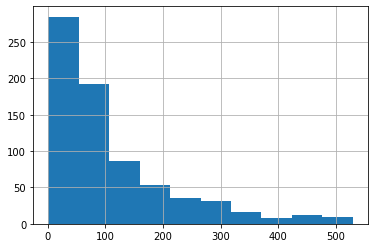

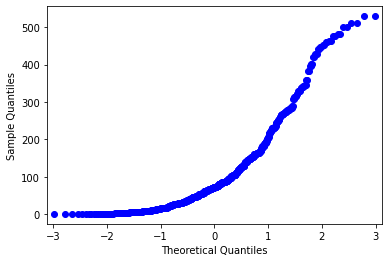

In [ ]:
Hạng_PT.hist()
sm.qqplot(Hạng_PT)

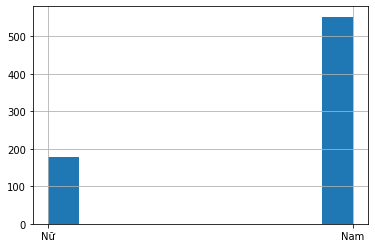

In [ ]:
Giới_tính.hist()


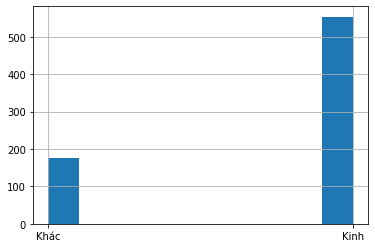

In [ ]:
Dân_tộc.hist()


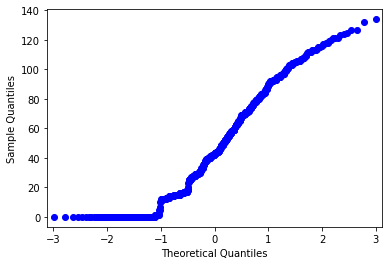

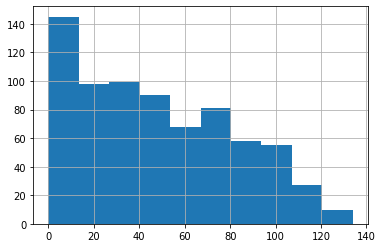

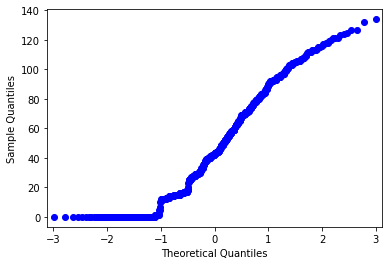

In [ ]:
Thời_gian_tự_học.hist()
sm.qqplot(Thời_gian_tự_học)

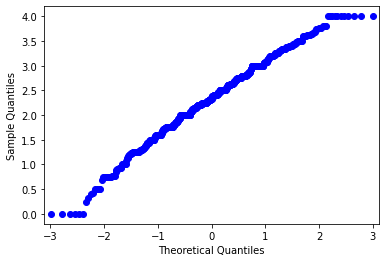

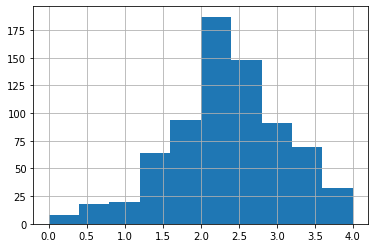

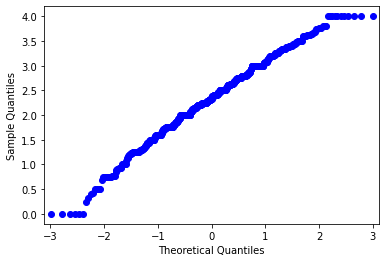

In [ ]:
Điểm_giữa_kỳ.hist()
sm.qqplot(Điểm_giữa_kỳ)

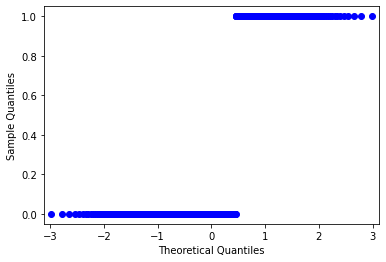

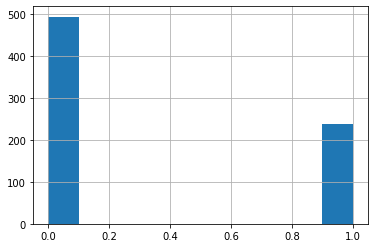

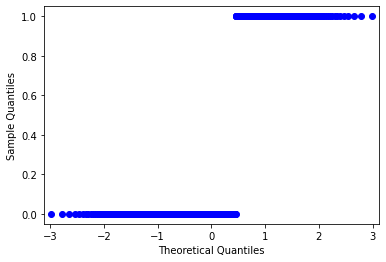

In [ ]:
Thể_thao.hist()
sm.qqplot(Thể_thao)

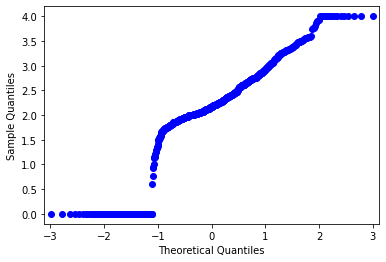

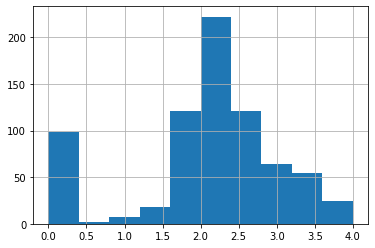

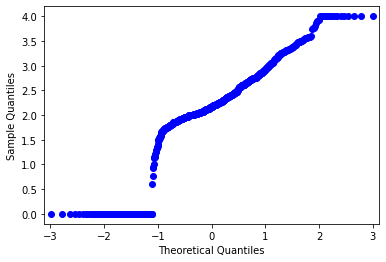

In [ ]:
Điểm_cuối_kỳ.hist()
sm.qqplot(Điểm_cuối_kỳ)

In [ ]:
pvalue_k = kstest(rvs=Điểm_TBTN, cdf='norm', args=(np.mean(Điểm_TBTN), np.std(Điểm_TBTN)))[1]
if pvalue_k > 0.05:
    print(f'Mẫu tuân theo phân phối chuẩn')
else:
    print(f'Mẫu không tuân theo phân phối chuẩn')

Mẫu tuân theo phân phối chuẩn


In [ ]:
pvalue_s = shapiro(Điểm_TBTN)[1]
if pvalue_s > 0.05:
    print(f'Mẫu tuân theo phân phối chuẩn')
else:
    print(f'Mẫu không tuân theo phân phối chuẩn')

Mẫu không tuân theo phân phối chuẩn


# *Kiểm định Shapiro*

In [ ]:
pvalue_s = shapiro(Tổng_HS)[1]
if pvalue_s > 0.05:
    print(f'Mẫu tuân theo phân phối chuẩn')
else:
    print(f'Mẫu không tuân theo phân phối chuẩn')

Mẫu không tuân theo phân phối chuẩn


In [ ]:
pvalue_s = shapiro(Tỉ_lệ_Văn_Toán)[1]
if pvalue_s > 0.05:
    print(f'Mẫu tuân theo phân phối chuẩn')
else:
    print(f'Mẫu không tuân theo phân phối chuẩn')

Mẫu không tuân theo phân phối chuẩn


In [ ]:
pvalue_s = shapiro(Tổng_HS)[1]
if pvalue_s > 0.05:
    print(f'Mẫu tuân theo phân phối chuẩn')
else:
    print(f'Mẫu không tuân theo phân phối chuẩn')

Mẫu không tuân theo phân phối chuẩn


In [ ]:
pvalue_s = shapiro(Thời_gian_tự_học)[1]
if pvalue_s > 0.05:
    print(f'Mẫu tuân theo phân phối chuẩn')
else:
    print(f'Mẫu không tuân theo phân phối chuẩn')

Mẫu không tuân theo phân phối chuẩn


In [ ]:
pvalue_s = shapiro(Điểm_giữa_kỳ)[1]
if pvalue_s > 0.05:
    print(f'Mẫu tuân theo phân phối chuẩn')
else:
    print(f'Mẫu không tuân theo phân phối chuẩn')

Mẫu không tuân theo phân phối chuẩn


In [ ]:
pvalue_s = shapiro(Thể_thao)[1]
if pvalue_s > 0.05:
    print(f'Mẫu tuân theo phân phối chuẩn')
else:
    print(f'Mẫu không tuân theo phân phối chuẩn')

Mẫu không tuân theo phân phối chuẩn


In [ ]:
pvalue_s = shapiro(Điểm_cuối_kỳ)[1]
if pvalue_s > 0.05:
    print(f'Mẫu tuân theo phân phối chuẩn')
else:
    print(f'Mẫu không tuân theo phân phối chuẩn')

Mẫu không tuân theo phân phối chuẩn


# Tính phương sai:

In [ ]:
Mean_v = df.var(axis= 0)
Mean_v

Điểm TBTN               1.382670
Tỉ lệ Văn/Toán          0.023597
Tổng HS             39443.327126
Hạng PT             12026.943039
Học kỳ                  0.250342
Thời gian tự học     1234.408534
Điểm giữa kỳ            0.574804
Thể thao                0.219879
Điểm cuối kỳ            0.980644
dtype: float64

# Tính độ lệch chuẩn:

In [ ]:
Mean_s = df.std(axis= 0)
Mean_s

Điểm TBTN             1.175870
Tỉ lệ Văn/Toán        0.153612
Tổng HS             198.603442
Hạng PT             109.667420
Học kỳ                0.500342
Thời gian tự học     35.134151
Điểm giữa kỳ          0.758158
Thể thao              0.468913
Điểm cuối kỳ          0.990275
dtype: float64

# Tính giá trị trung bình:

In [ ]:
import statistics

In [ ]:
x = statistics.mean(Điểm_TBTN)     
  
print("Giá trị trung bình của datasets là:", x) 

Giá trị trung bình của datasets là: 6.283543091655266


In [ ]:
x = statistics.mean(Thời_gian_tự_học)     
# In giá trị trung bình của danh sách  
print("Giá trị trung bình của datasets là:", x) 

Giá trị trung bình của datasets là: 47.06155950752394


In [ ]:
x = statistics.mean(Thể_thao)     
  
print("Giá trị trung bình của datasets là:", x) 

Giá trị trung bình của datasets là: 0.32558139534883723


In [ ]:
x = statistics.mean(Điểm_giữa_kỳ)     
  
print("Giá trị trung bình của datasets là:", x) 

Giá trị trung bình của datasets là: 2.3313816689466482


In [ ]:
x = statistics.mean(Điểm_cuối_kỳ)     
  
print("Giá trị trung bình của datasets là:", x) 

Giá trị trung bình của datasets là: 2.0806292749658004
